---
title: "Intro to ODEs"
subtitle: "BMES 678: Programming Assignment"
author: "Tony Kabilan Okeke"
format: PrettyPDF-pdf
---

In [80]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np

from typing import Callable
import warnings
warnings.filterwarnings("ignore")

## Phase Diagram

Consider the following Lotka-Volterra predator-prey model:

- $x'(t) = Ax(t) - Bx(t)y(t)$
- $y'(t) = Cx(t)y(t) - Dy(t)$

Let $A=D=2, B=C=1.8$

Draw the phase diagram. You do not need to show any integral curves.

What are the predator/prey equilibrium populations (i.e., population sizes do not change over time)?

In [81]:
# use sympy to determine equilibrium points -> x' = 0, y' = 0
t = sp.symbols("t")
x = sp.Function("x")(t)
y = sp.Function("y")(t)

# constants
A = D = 2
B = C = 1.8

# differential equations
dx = A*x - B*x*y
dy = C*x*y - D*y

# solve for equilibrium points
equilibrium = sp.solve([dx, dy], (x, y))

print('Equilibrium populations:')
for i, lab in enumerate(['prey (x)', 'predator (y)']):
    print(f"- {lab} =", ', '.join([f"{x[i]:.2}" for x in equilibrium]))

Equilibrium populations:
- prey (x) = 0.0, 1.1
- predator (y) = 0.0, 1.1


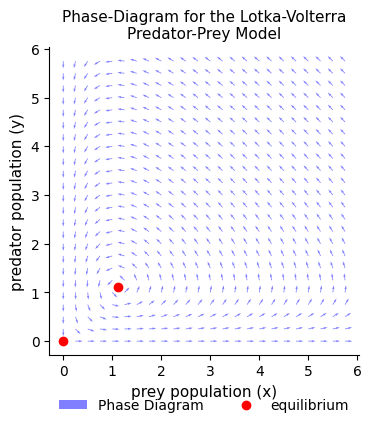

In [82]:
#| fig-align: center
#| fig-cap: Phase diagram for the Lotka-Volterra predator-prey model

# meshgrid
x = np.arange(0, 6, 0.25)
y = np.arange(0, 6, 0.25)
X, Y = np.meshgrid(x, y)

# derivatives
dx = A*X - B*X*Y
dy = C*X*Y - D*Y

# normalize
norm = np.sqrt(dx**2 + dy**2)
dx /= norm
dy /= norm

# plot
fig, ax = plt.subplots(figsize=(4, 4))
ax.quiver(X, Y, dx, dy, color="blue", alpha=0.5, label="Phase Diagram")
for i, p in enumerate(equilibrium):
    ax.plot(*p, 'ro', label='equilibrium' if i == 0 else None)
ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("prey population (x)", fontsize=11) 
ax.set_ylabel("predator population (y)", fontsize=11)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False)
ax.set_title("Phase-Diagram for the Lotka-Volterra\nPredator-Prey Model", fontsize=11);

## Euler's Method

Write a function *`[X,Y]=eulermethod(fprime, timespan, y0, h=0.1)`* where

- `fprime`: function handle representing derivative of f for a given value of x.
- `timespan=[x0 xend]`: starting and ending values of x
- `y0`: f(x0), value of function at x=x0.
- `h`: step size (default h=0.1)

Your function should calculate using Euler's method and store in Y, the successive values of f(x) for X=x0..xend. It is okay if the last entry in X does not reach exactly xend.

Use the eulermethod() function you wrote to approximate the value of sin(x), for x=0..10. Compare the values of sin(x) and the approximated values by showing them on the same plot. What is the average absolute error in your approximated values (average for entire x=0..10, not just for x=10)?

In [83]:

def eulermethod(
    fprime: Callable, 
    timespan: tuple[float, float], 
    y0: float, 
    h: float = 0.1,
) -> tuple[list[float], list[float]]:
    """Euler's method for solving ODEs"""

    x0, xend = timespan
    X = [x0 + i*h for i in range(int(np.ceil((xend - x0) / h)))]
    Y = [y0]
    for i in range(1, len(X)):
        Y.append(Y[-1] + h * fprime(X[i-1], Y[-1]))
    
    return X, Y


# use eulermethod to approximate the value of sin(x), for x=0..10.
# d(sin(x))/dx = cos(x)
X, Y_hat = eulermethod(lambda x, y: np.cos(x), (0, 10), 0)

# compute actual values
Y = np.sin(X)

# MAE
mae = np.mean(np.abs(Y_hat - Y))
print(f"MAE: {mae:.4f}")

MAE: 0.0521


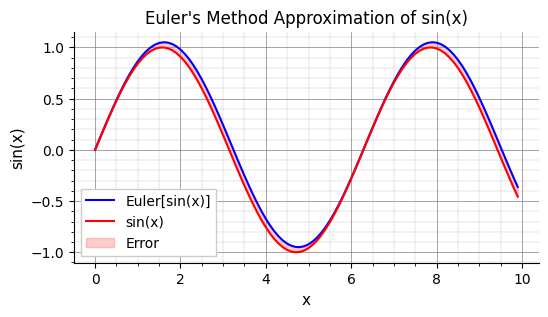

In [84]:
#| fig-align: center
#| fig-cap: Euler's method approximation of $sin(x)$

fig, ax = plt.subplots(figsize=(6,3))

ax.plot(X, Y_hat, label="Euler[sin(x)]", color="blue")
ax.plot(X, Y, label="sin(x)", color="red")
ax.fill_between(X, Y_hat, Y, color="red", alpha=0.2, label="Error")
ax.minorticks_on()
ax.legend(fancybox=False, framealpha=1)
ax.spines[["top", "right"]].set_visible(False)
ax.grid(which="major", color="gray", linewidth=0.5)
ax.grid(which="minor", color="gray", linewidth=0.2, linestyle="--")
ax.set_xlabel("x", fontsize=11)
ax.set_ylabel("sin(x)", fontsize=11)
ax.set_title("Euler's Method Approximation of sin(x)", fontsize=12);